### Common distribution with Scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


#### Uniform distribution 

In [8]:
uniform_data = stats.uniform.rvs(size = 100000, loc = 0, scale = 10)

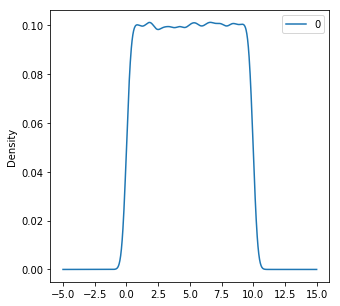

In [9]:
# Density function
pd.DataFrame(uniform_data).plot(kind = "density", figsize = (5, 5))

In [11]:
# Cumulative function 
stats.uniform.cdf(x = 4, loc = 0, scale = 10)

0.4

In [12]:
# Quantile function 
stats.uniform.ppf(q = 0.4, loc = 0, scale = 10)

4.0

### Generating (uniform) integer numbers 

In [13]:
import random 

In [14]:
# integer number in a range 
random.randint(0, 10)

2

In [15]:
# pick up a value from a sequence randomly 
random.choice([2, 5, 11, 2])

2

In [16]:
# Real uniform values 
random.uniform(0, 10)

9.832832900153468

### Normal distribution 

In [20]:
# A standard normal distr. 
# Prob that Z generates values smaller than -0.5? 

prob_left = stats.norm.cdf(x = -0.5, loc = 0, scale = 1)

# Prob that Z generates values bigger than 0.5?
prob_right = 1 - stats.norm.cdf(x = 0.5, loc = 0, scale = 1)

# Prob that Z generates values between -0.5 and 0.5? 
prob_center = 1 - (prob_left + prob_right) # how to check that without do that?

In [21]:
print(prob_left, prob_center, prob_right)

0.3085375387259869 0.38292492254802624 0.3085375387259869


### Poisson distribution 

In [22]:
random.seed(123)

In [32]:
poisson_numbers = stats.poisson.rvs(size = 100000, mu = 5)

In [33]:
pd.crosstab(index = "counts", columns=poisson_numbers)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
row_0,,,,,,,,,,,,,,,,,,
counts,708,3448,8405,14094,17507,17406,14598,10436,6589,3624,1796,810,366,141,53,11,6,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e41438>]],
      dtype=object)

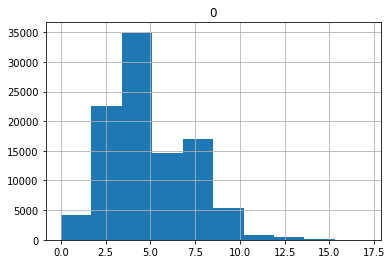

In [34]:
pd.DataFrame(poisson_numbers).hist()

### Generating values from an Exponential using the Inverse theorem 

In [37]:
def inverseFunction(lm, n): 
    u = stats.uniform.rvs(size = n, loc = 0, scale = 1)
    x = -lm * np.log(1 - u)
    return x

In [38]:
inverseFunction(1, 1)

array([1.60068716])

(array([5.901e+03, 2.415e+03, 1.009e+03, 4.150e+02, 1.570e+02, 5.400e+01,
        3.100e+01, 1.100e+01, 6.000e+00, 1.000e+00]),
 array([7.31286857e-05, 8.95446458e-01, 1.79081979e+00, 2.68619312e+00,
        3.58156645e+00, 4.47693978e+00, 5.37231311e+00, 6.26768643e+00,
        7.16305976e+00, 8.05843309e+00, 8.95380642e+00]),
 <a list of 10 Patch objects>)

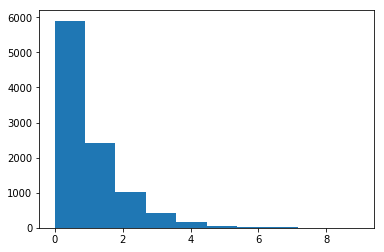

In [39]:
plt.hist(stats.expon.rvs(size = 10000, scale = 1))

(array([5.967e+03, 2.500e+03, 9.630e+02, 3.420e+02, 1.440e+02, 5.000e+01,
        2.200e+01, 9.000e+00, 1.000e+00, 2.000e+00]),
 array([2.58953219e-06, 9.26422118e-01, 1.85284165e+00, 2.77926118e+00,
        3.70568070e+00, 4.63210023e+00, 5.55851976e+00, 6.48493929e+00,
        7.41135882e+00, 8.33777835e+00, 9.26419788e+00]),
 <a list of 10 Patch objects>)

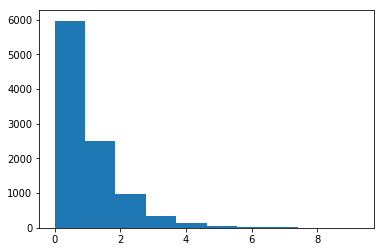

In [40]:
plt.hist(inverseFunction(lm = 1, n = 10000))

### Acceptance - Rejection Alg. 

In [62]:
# We want to generate from a mixture of two normal distributions 
# Y = A + B where A and B are Normal with different shapes 
# A is N(3, 4) and B is N(8, 6)
# Assume that we know how to generate from a Normal 
# Assume that we know the density function of the target distribution, 
# but that we don't know how to generate from it 

# Target 
def f(x): 
    out = stats.norm.pdf(x, loc = 30, scale = 10) + stats.norm.pdf(x, loc = 80, scale = 20)
    return out 

# Envelope 
def g(x): 
    out = stats.norm.pdf(x, loc = 50, scale = 30)
    return out


In [68]:
range_of_values = np.arange(-100, 200)

In [69]:
alpha = 1 / max(f(range_of_values)/g(range_of_values))

In [70]:
alpha

0.2554522657650303

In [80]:
def AR_simple_alg(iterations):
    generated_samples = []
    
    for i in range(iterations):
        y = np.random.normal(50, 30)
        u = np.random.uniform(0, 1)
        
        ratio = f(y)/(g(y) / alpha)
        
        if u <= ratio:
            generated_samples.append(y)
            
    return generated_samples

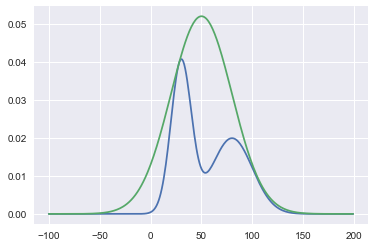

In [81]:
plt.plot(range_of_values, f(range_of_values))
plt.plot(range_of_values, 1/alpha * g(range_of_values))

In [82]:
simulations = AR_simple_alg(iterations=100000)

In [83]:
import seaborn as sns 

In [84]:
sns.set()

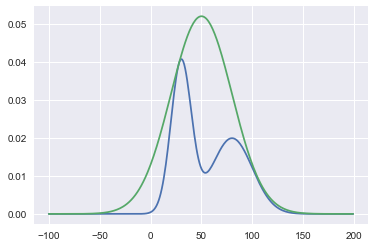

In [86]:
plt.plot(range_of_values, f(range_of_values))
plt.plot(range_of_values, 1/alpha * g(range_of_values))

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


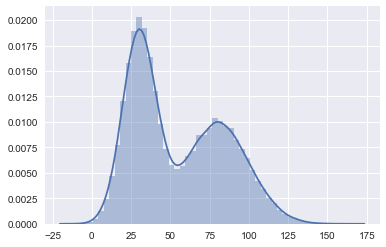

In [87]:
sns.distplot(simulations)

In [89]:
len(simulations)/100000 * 100 # observed acceptance ratio 

50.931000000000004

In [90]:
alpha # expected acceptance ratio 

0.2554522657650303

### Empirical Cumulative Density Function (ECDF)

In [94]:
## Not already implemented version 

data = [101, 20, 112, 454, 678, 44, 332, 678]

# Assuming that data is a list 
def ecdf_function(data):
    # number of observations, n
    n = len(data) 
    
    # extracting the data from x and sorting it 
    x = np.sort(data) 
    
    # getting the F(x) for each value, my y
    y = np.arange(1, n+1)/n
    
    return x, y

In [95]:
ecdf_function(data)

(array([ 20,  44, 101, 112, 332, 454, 678, 678]),
 array([0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]))

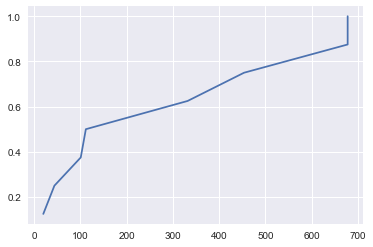

In [97]:
plt.plot(ecdf_function(data)[0], ecdf_function(data)[1])